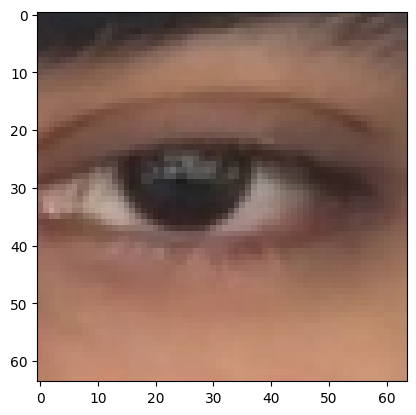

1/1 [==============================] - 6s 6s/step


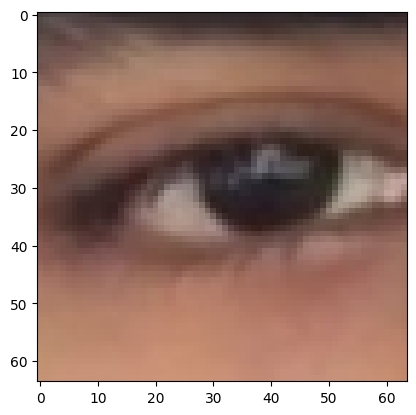

1/1 [==============================] - 0s 70ms/step
Prediction: awake
Prediction: awake


In [4]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

def detect_eyes(image_path):
    # Read input image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Load the haarcascade to detect faces
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    # Load the haarcascade to detect eyes
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')

    # Detect faces in the input image
    faces = face_cascade.detectMultiScale(gray, 1.3, 4)
    eye_images = []

    # Loop over the detected faces
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        # Detect eyes within the detected face area (roi)
        eyes = eye_cascade.detectMultiScale(roi_gray)

        # Extract and store the eye images
        for i, (ex, ey, ew, eh) in enumerate(eyes):
            # Extract the eye region
            eye_region = roi_color[ey:ey+eh, ex:ex+ew]
            eye_img = cv2.cvtColor(eye_region, cv2.COLOR_BGR2RGB)
            eye_img = cv2.resize(eye_img, (64, 64))  # Resize to match model input shape
            eye_img = eye_img / 255.0  # Normalize pixel values
            eye_img = tf.expand_dims(eye_img, axis=0)  # Add batch dimension
            eye_images.append(eye_img)

    return eye_images[0]

# Example usage
image_path = '926.jpg'
eye_images = detect_eyes(image_path)

# Define the class labels
class_labels = ['sleeping', 'awake']

# Predict each eye image using the loaded model
predictions = []
for eye_img in eye_images:
    plt.imshow(eye_img[0].numpy())
    plt.show()
    prediction = model.predict(eye_img)
    if prediction[0][0] > 0.5:
        class_index = 1
    else :
        class_index = 0
    class_label = class_labels[class_index]
    predictions.append(class_label)

# Display the output eye predictions
for prediction in predictions:
    print(f'Prediction: {prediction}')
